In [1]:
# Data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# label encoder,Standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modeling 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

# Validation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path=r"F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Assignments\case_study_1\USA_Housing.csv"
data=pd.read_csv(file_path)

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
houseAddress=data.Address
df_address=houseAddress.str.split('\n',expand=True)
df_address.head(100)

,0,1
0,208 Michael Ferry Apt. 674,"Laurabury, NE 37010-5101"
1,188 Johnson Views Suite 079,"Lake Kathleen, CA 48958"
2,9127 Elizabeth Stravenue,"Danieltown, WI 06482-3489"
3,USS Barnett,FPO AP 44820
4,USNS Raymond,FPO AE 09386
...,...,...
95,69600 Wilson Rue,"Elizabethland, PW 17767-2884"
96,001 Steve Plaza,"Jessicastad, UT 25190"
97,238 Anthony Drive,"Acostahaven, AS 62753-6637"
98,01818 Wilson Spurs,"West Andreaton, SD 69568-7005"


In [6]:
houseAddress.nunique()

5000

In [7]:
df_address[1].nunique()

5000

### Prediction without 'Address'


In [8]:
X=data.drop(columns=['Address','Price'])
y=data.Price

In [9]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [11]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039
std,10657.991214,0.991456,1.005833,1.234137,9925.650114
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


In [12]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

### Check for outliers 

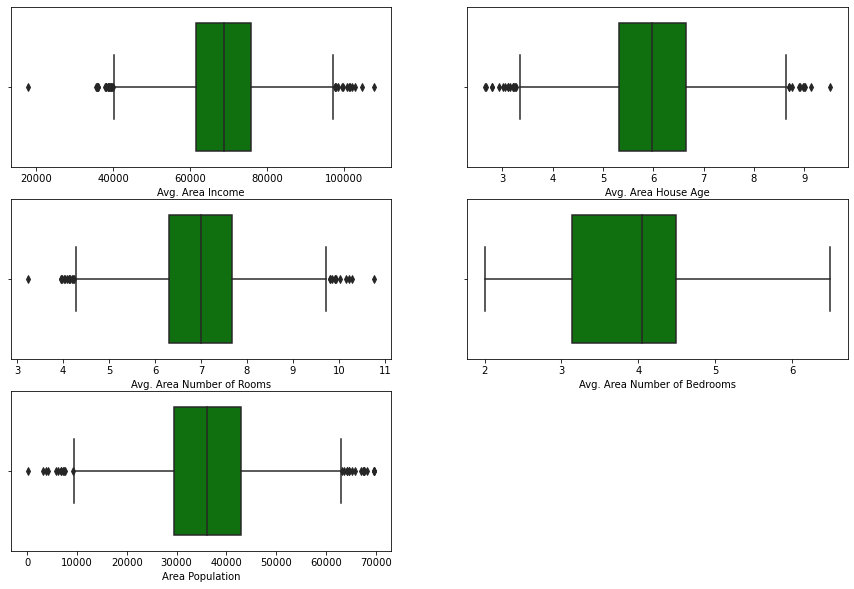

In [13]:
feat_data=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']
f = plt.figure(figsize=(15,10))
for i in range(5):
    f.add_subplot(3, 2, i+1)
    sns.boxplot(data[feat_data[i]],color='Green')
plt.show()

### Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Avg. Area Income'),
  Text(1.5, 0, 'Avg. Area House Age'),
  Text(2.5, 0, 'Avg. Area Number of Rooms'),
  Text(3.5, 0, 'Avg. Area Number of Bedrooms'),
  Text(4.5, 0, 'Area Population')])

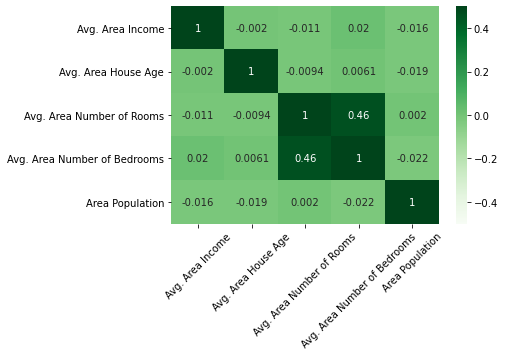

In [14]:
sns.heatmap(X.corr(),annot=True,cmap='Greens',vmax=0.5,vmin=-0.5)
plt.xticks(rotation=45)

### Split the dataset 

In [15]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 4000 records.
The testing dataset has 1000 records.


### Decision Tree Regression 

In [16]:
clf = DecisionTreeRegressor(random_state = 42) 
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
ypred = clf.predict(X_test)

ytest_ds=pd.DataFrame(y_test)
ind=y_test.index
ypred_df=pd.DataFrame(ypred,index=ind)
result_df=pd.concat([ypred_df,ytest_ds],axis=1)
result_df

,0,Price
1501,1.237361e+06,1.339096e+06
2586,1.140126e+06,1.251794e+06
2653,1.525602e+06,1.340095e+06
1055,1.174748e+06,1.431508e+06
705,1.329521e+06,1.042374e+06
...,...,...
4711,1.025418e+06,1.107031e+06
2313,1.205378e+06,1.405505e+06
3214,1.891949e+06,1.924156e+06
2732,1.798522e+06,1.571254e+06


In [18]:
result_df. rename(columns = {0:'Predicted', 'Price':'Actual'}, inplace = True)
result_df

,Predicted,Actual
1501,1.237361e+06,1.339096e+06
2586,1.140126e+06,1.251794e+06
2653,1.525602e+06,1.340095e+06
1055,1.174748e+06,1.431508e+06
705,1.329521e+06,1.042374e+06
...,...,...
4711,1.025418e+06,1.107031e+06
2313,1.205378e+06,1.405505e+06
3214,1.891949e+06,1.924156e+06
2732,1.798522e+06,1.571254e+06


Text(0.5, 0, 'error')

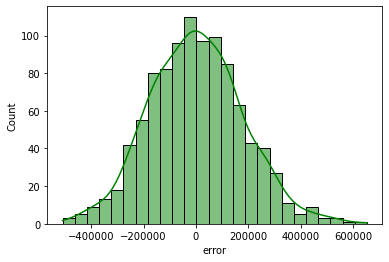

In [19]:
error=result_df['Actual']-result_df['Predicted']
sns.histplot(error,kde=True,color='Green')
plt.xlabel('error')

Text(0.5, 0, 'abs(error)')

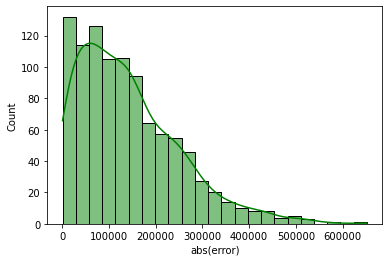

In [20]:
sns.histplot(error.abs(),kde=True,color='Green')
plt.xlabel('abs(error)')

Text(0.5, 0, 'error**2')

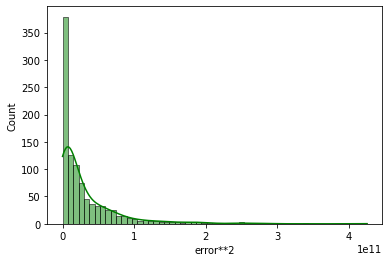

In [21]:
sns.histplot(error**2,kde=True,color='Green')
plt.xlabel('error**2')

In [22]:
print('MSE :',mean_squared_error(y_test,ypred))
print('MAE :',mean_absolute_error(y_test,ypred))

MSE : 31568012111.933002
MAE : 140823.9622961814


### Scale the dataset 

In [23]:
# Standardization
sc1=StandardScaler()
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

### Linear Regression 

In [24]:
modLinear=LinearRegression().fit(X_train,y_train)

print("intercept: " ,modLinear.intercept_)
print('coefficient: ',modLinear.coef_[0])


intercept:  1229576.9925600903
coefficient:  231741.8766521736


In [25]:
ypred=modLinear.predict(X_test)


In [26]:
ytest_ds=pd.DataFrame(y_test)
ind=y_test.index
ypred_df=pd.DataFrame(ypred,index=ind)
result_df=pd.concat([ypred_df,ytest_ds],axis=1)


In [27]:
result_df. rename(columns = {0:'Predicted', 'Price':'Actual'}, inplace = True)
result_df

,Predicted,Actual
1501,1.308588e+06,1.339096e+06
2586,1.237037e+06,1.251794e+06
2653,1.243429e+06,1.340095e+06
1055,1.228900e+06,1.431508e+06
705,1.063321e+06,1.042374e+06
...,...,...
4711,1.042903e+06,1.107031e+06
2313,1.318532e+06,1.405505e+06
3214,1.870001e+06,1.924156e+06
2732,1.663624e+06,1.571254e+06


Text(0.5, 0, 'error')

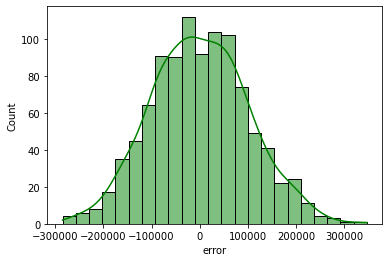

In [28]:
error=result_df['Actual']-result_df['Predicted']
sns.histplot(error,kde=True,color='Green')
plt.xlabel('error')

Text(0.5, 0, 'abs(error)')

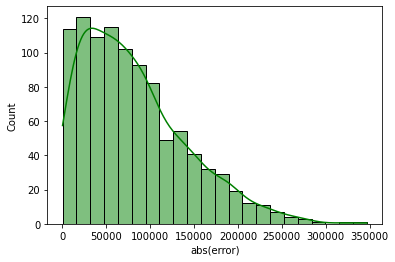

In [29]:
sns.histplot(error.abs(),kde=True,color='Green')
plt.xlabel('abs(error)')

Text(0.5, 0, 'error**2')

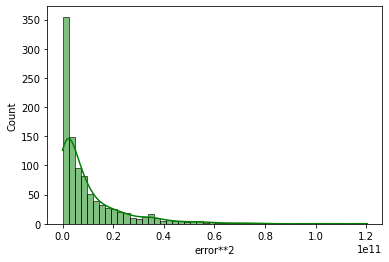

In [30]:
sns.histplot(error**2,kde=True,color='Green')
plt.xlabel('error**2')

In [31]:
print('MSE :',mean_squared_error(y_test,ypred))
print('MAE :',mean_absolute_error(y_test,ypred))

MSE : 10089009300.893988
MAE : 80879.09723489442
